In [90]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [91]:
def show_img_plt(img, c_map ='gray', fig_hight=5, fig_width=4, vmin=0, vmax=255):
    plt.figure(figsize=(fig_hight, fig_width), dpi=100)
    plt.imshow(img, cmap=c_map, vmin=vmin, vmax=vmax)

In [92]:
def show_mult_img(rows, columns, img_names, vmin=0, vmax=255):
    fig = plt.figure(figsize=(10, 12), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i], cmap='gray', vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

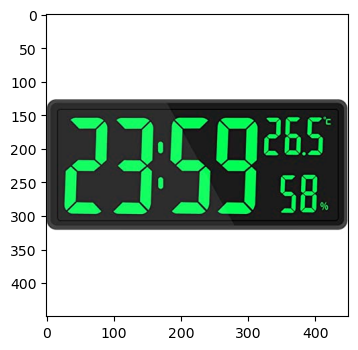

In [93]:
img = cv2.imread('img/input.jpg')
show_img_plt(img)

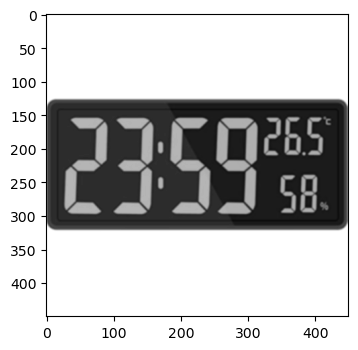

In [150]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
show_img_plt(img_blur)

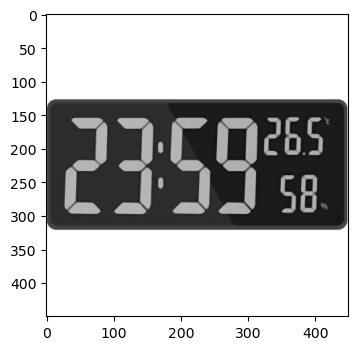

In [106]:
img_median = cv2.medianBlur(img_gray, 5)
show_img_plt(img_median)

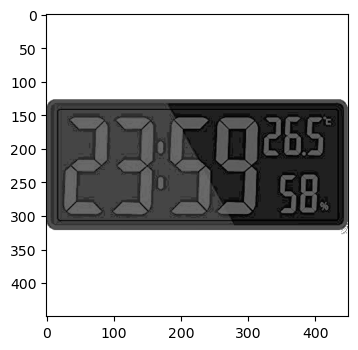

In [123]:
he_img = cv2.equalizeHist(img_gray)
show_img_plt(he_img)

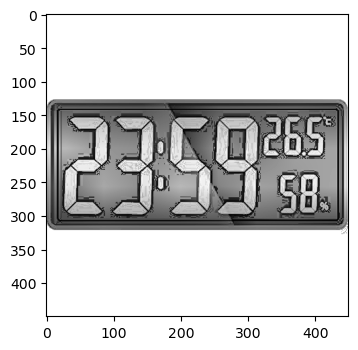

In [143]:
clahe = cv2.createCLAHE(clipLimit=130)
clahe_img = clahe.apply(img_gray)
show_img_plt(clahe_img)


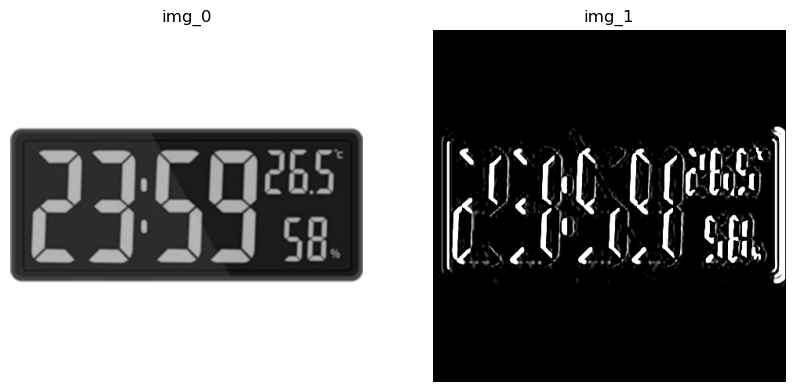

In [196]:
#Gradient
sobelx = cv2.Sobel(src=img_blur, ddepth=-1, dx=1, dy=0, ksize=5)
show_mult_img(1, 2, (img_blur, sobelx))

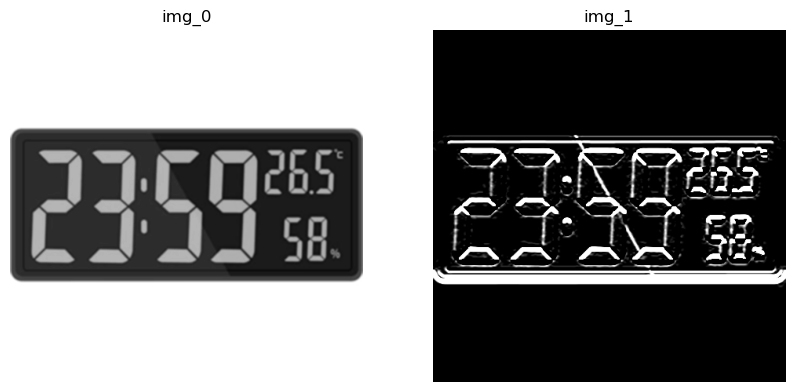

In [197]:
sobely = cv2.Sobel(src=img_blur, ddepth=-1, dx=0, dy=1, ksize=5)
show_mult_img(1, 2, (img_blur, sobely))

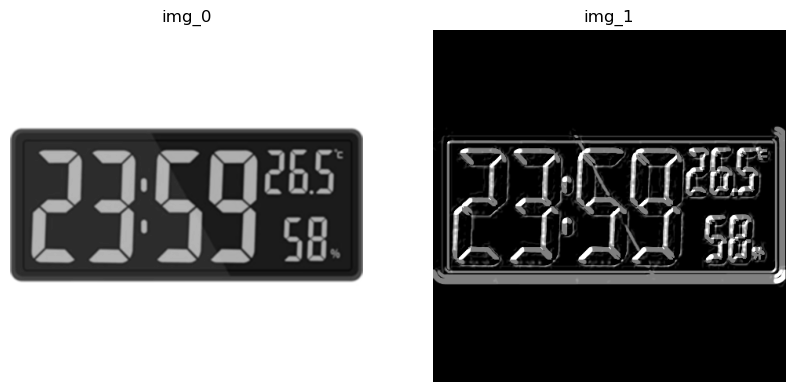

In [198]:
# magnitude = ((sobelx)**2 + (sobely**2))**(1/2)
# magnitude = abs(sobelx) + abs(sobely)

gradient = cv2.addWeighted(np.abs(sobelx), 0.5, np.abs(sobely), 0.5, 0)
show_mult_img(1, 2, (img_blur, gradient))

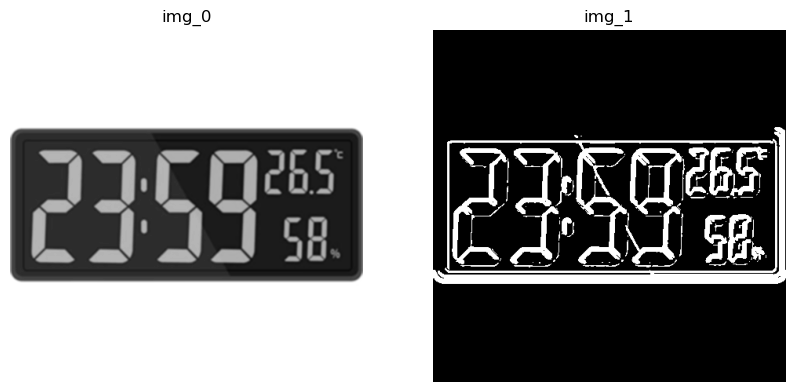

In [199]:
threshold_value = 80
ret, thresh = cv2.threshold(gradient, threshold_value, 255, cv2.THRESH_BINARY)
show_mult_img(1, 2, (img_blur, thresh))

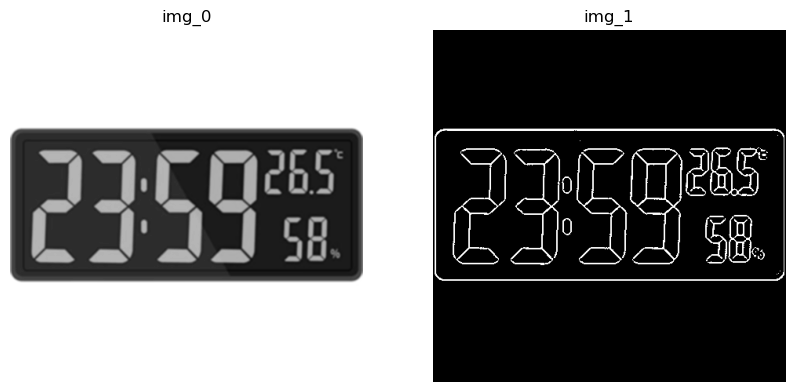

In [215]:
laplacian = cv2.Laplacian(img_blur, -1)
threshold_value =12
ret, thresh = cv2.threshold(laplacian, threshold_value, 255, cv2.THRESH_BINARY)
show_mult_img(1, 2, (img_blur, thresh))

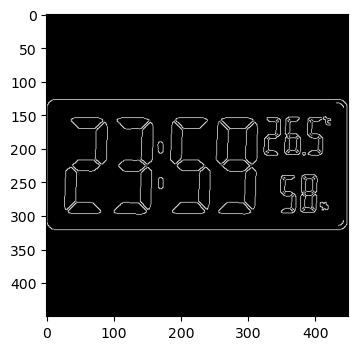

In [216]:
canny = cv2.Canny(image=img_blur, threshold1=120, threshold2=140)
show_img_plt(canny)

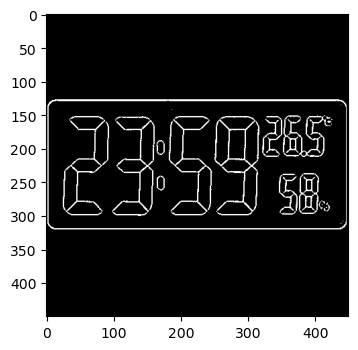

In [217]:
show_img_plt(  thresh )